In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close'].squeeze()  # Ensure it's a Series

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    Ensure that 'data' is a pandas Series.
    """
    # Ensure data is a pandas Series
    if not isinstance(data, pd.Series):
        raise ValueError("Input data must be a pandas Series.")
    
    # Calculate returns, volatility, and rate of change
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    
    # Align the data based on the index
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define the Generator model
def build_generator(latent_dim, output_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(output_dim, activation='linear'))
    return model

# Step 4: Define the Discriminator model
def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Step 5: Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return gan

# Step 6: Prepare data and train the model
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Set dimensions
input_dim = scaled_features.shape[1]
latent_dim = 2  # Number of latent variables

# Build models
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# Build and compile the GAN
gan = build_gan(generator, discriminator)

# Training the GAN
epochs = 10000
batch_size = 16
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, scaled_features.shape[0], half_batch)
    real_samples = scaled_features[idx]
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    fake_samples = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(real_samples, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss}] [G loss: {g_loss}]")

# Step 7: Generate synthetic data
noise = np.random.normal(0, 1, (scaled_features.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)

# Step 8: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(real_data.index, real_data.values, label="Original Data", color='blue')
plt.plot(real_data.index, synthetic_data[:, 0], label="Synthetic Data - Returns", color='red', linestyle='--')
plt.plot(real_data.index, synthetic_data[:, 1], label="Synthetic Data - Volatility", color='green', linestyle='--')
plt.plot(real_data.index, synthetic_data[:, 2], label="Synthetic Data - ROC", color='orange', linestyle='--')
plt.title("Original vs. Synthetic Financial Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


AttributeError: 'NoneType' object has no attribute 'update_state'

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close'].squeeze()  # Ensure it's a Series

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    Ensure that 'data' is a pandas Series.
    """
    # Ensure data is a pandas Series
    if not isinstance(data, pd.Series):
        raise ValueError("Input data must be a pandas Series.")
    
    # Calculate returns, volatility, and rate of change
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    
    # Align the data based on the index
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define the Generator model
def build_generator(latent_dim, output_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(output_dim, activation='linear'))
    return model

# Step 4: Define the Discriminator model
def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Step 5: Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return gan

# Step 6: Prepare data and train the model
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Set dimensions
input_dim = scaled_features.shape[1]
latent_dim = 2  # Number of latent variables

# Build models
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# Build and compile the GAN
gan = build_gan(generator, discriminator)

# Training the GAN
epochs = 10000
batch_size = 16
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, scaled_features.shape[0], half_batch)
    real_samples = scaled_features[idx]
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    fake_samples = generator.predict(noise)
    
    # Train on real and fake samples
    d_loss_real = discriminator.train_on_batch(real_samples, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss}] [G loss: {g_loss}]")

# Step 7: Generate synthetic data
noise = np.random.normal(0, 1, (scaled_features.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)

# Step 8: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(real_data.index, real_data.values, label="Original Data", color='blue')
plt.plot(real_data.index, synthetic_data[:, 0], label="Synthetic Data - Returns", color='red', linestyle='--')
plt.plot(real_data.index, synthetic_data[:, 1], label="Synthetic Data - Volatility", color='green', linestyle='--')
plt.plot(real_data.index, synthetic_data[:, 2], label="Synthetic Data - ROC", color='orange', linestyle='--')
plt.title("Original vs. Synthetic Financial Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


AttributeError: 'NoneType' object has no attribute 'update_state'

In [29]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close'].squeeze()  # Ensure it's a Series

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    Ensure that 'data' is a pandas Series.
    """
    # Ensure data is a pandas Series
    if not isinstance(data, pd.Series):
        raise ValueError("Input data must be a pandas Series.")
    
    # Calculate returns, volatility, and rate of change
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    
    # Align the data based on the index
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define the Generator model
def build_generator(latent_dim, output_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(output_dim, activation='linear'))
    return model

# Step 4: Define the Discriminator model
def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Step 5: Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    # Compile GAN with binary crossentropy loss and Adam optimizer
    gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return gan

# Step 6: Prepare data and train the model
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Set dimensions
input_dim = scaled_features.shape[1]
latent_dim = 2  # Number of latent variables

# Build models
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)

# Compile the discriminator with binary crossentropy loss and Adam optimizer
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# Build and compile the GAN
gan = build_gan(generator, discriminator)

# Training the GAN
epochs = 1000
batch_size = 4
half_batch = batch_size // 2

# Compile the discriminator
discriminator.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    metrics=['accuracy']
)

# Training the GAN
for epoch in range(epochs):
    # Select a random half batch of real data
    idx = np.random.randint(0, scaled_features.shape[0], half_batch)
    real_samples = scaled_features[idx]

    # Generate a half batch of fake data
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    fake_samples = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_samples, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator (through the combined model)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss}] [G loss: {g_loss}]")



# Step 7: Generate synthetic data
noise = np.random.normal(0, 1, (scaled_features.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)

# Step 8: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(real_data.index, real_data.values, label="Original Data", color='blue')
plt.plot(real_data.index, synthetic_data[:, 0], label="Synthetic Data - Returns", color='red', linestyle='--')
plt.plot(real_data.index, synthetic_data[:, 1], label="Synthetic Data - Volatility", color='green', linestyle='--')
plt.plot(real_data.index, synthetic_data[:, 2], label="Synthetic Data - ROC", color='orange', linestyle='--')
plt.title("Original vs. Synthetic Financial Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/home/j/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:80: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: [0.6137111 0.75     ]] [G loss: 0.6884704828262329]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close'].squeeze()  # Ensure it's a Series

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    Ensure that 'data' is a pandas Series.
    """
    # Ensure data is a pandas Series
    if not isinstance(data, pd.Series):
        raise ValueError("Input data must be a pandas Series.")
    
    # Calculate returns, volatility, and rate of change
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    
    # Align the data based on the index
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define the Generator model
def build_generator(latent_dim, output_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(output_dim, activation='linear'))
    return model

# Step 4: Define the Discriminator model
def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Step 5: Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    # Compile GAN with binary crossentropy loss and Adam optimizer
    gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return gan

# Step 6: Prepare data and train the model
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Set dimensions
input_dim = scaled_features.shape[1]
latent_dim = 2  # Number of latent variables

# Build models
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)

# Compile the discriminator with binary crossentropy loss and Adam optimizer
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# Build and compile the GAN
gan = build_gan(generator, discriminator)

# Training the GAN
epochs = 1000  # Reduce from 10,000 to save time
batch_size = 8  # Smaller batch sizes are easier on the CPU
half_batch = batch_size // 2

# Compile the discriminator
discriminator.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    metrics=['accuracy']
)

# Training the GAN
for epoch in range(epochs):
    # Select a random half batch of real data
    idx = np.random.randint(0, scaled_features.shape[0], half_batch)
    real_samples = scaled_features[idx]

    # Generate a half batch of fake data
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    fake_samples = generator.predict_on_batch(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_samples, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator (through the combined model)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss}] [G loss: {g_loss}]")



# Step 7: Generate synthetic data
noise = np.random.normal(0, 1, (scaled_features.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)




[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:80: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: [0.8735022 0.25     ]] [G loss: 0.7143358588218689]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


ValueError: x and y must have same first dimension, but have shapes (251,) and (241,)

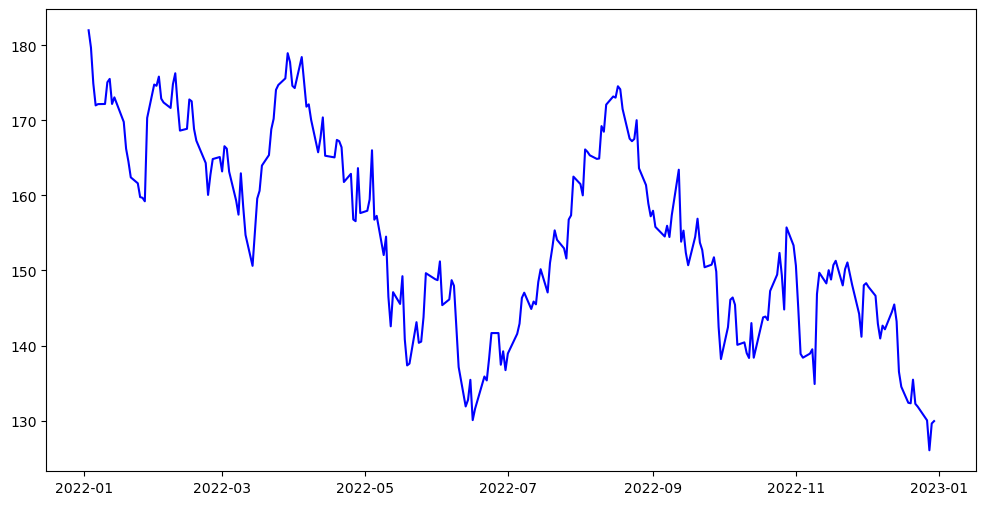

In [35]:
# Step 8: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(real_data.index[:500], real_data.values[:500], label="Original Data", color='blue')
plt.plot(real_data.index[:500], synthetic_data[:500, 0], label="Synthetic Data - Returns", color='red', linestyle='--')

plt.plot(real_data.index, synthetic_data[:, 1], label="Synthetic Data - Volatility", color='green', linestyle='--')
plt.plot(real_data.index, synthetic_data[:, 2], label="Synthetic Data - ROC", color='orange', linestyle='--')
plt.title("Original vs. Synthetic Financial Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

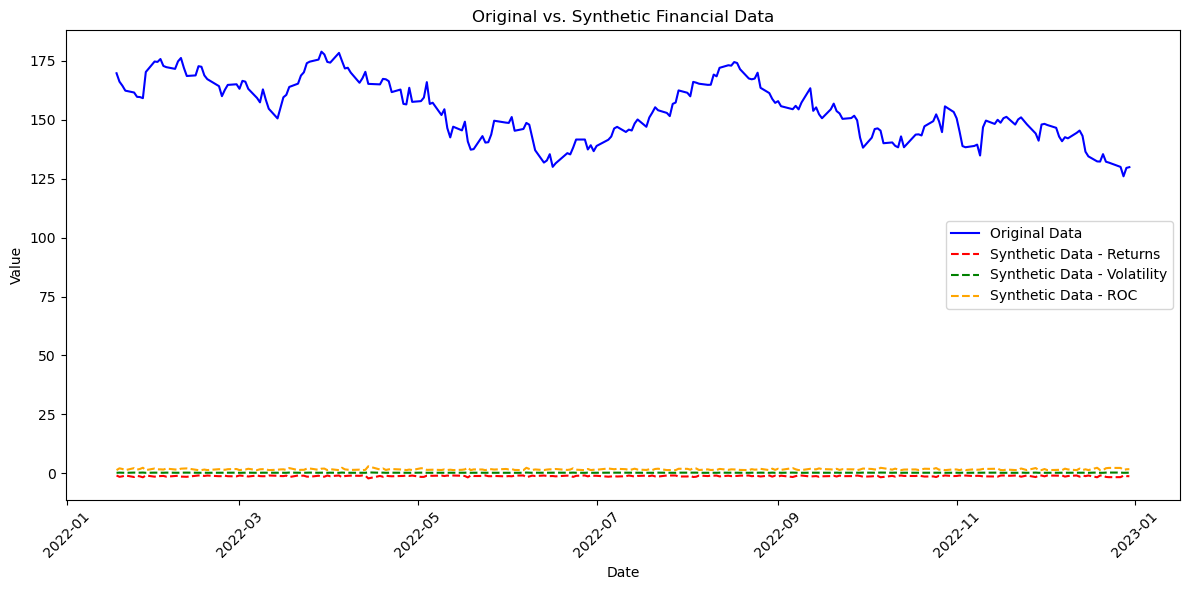

In [37]:
# Align real_data and synthetic_data
aligned_real_data = real_data.iloc[len(real_data) - len(synthetic_data):]

# Plot the aligned data
plt.figure(figsize=(12, 6))
plt.plot(aligned_real_data.index, aligned_real_data.values, label="Original Data", color='blue')
plt.plot(aligned_real_data.index, synthetic_data[:, 0], label="Synthetic Data - Returns", color='red', linestyle='--')
plt.plot(aligned_real_data.index, synthetic_data[:, 1], label="Synthetic Data - Volatility", color='green', linestyle='--')
plt.plot(aligned_real_data.index, synthetic_data[:, 2], label="Synthetic Data - ROC", color='orange', linestyle='--')

# Add plot details
plt.title("Original vs. Synthetic Financial Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


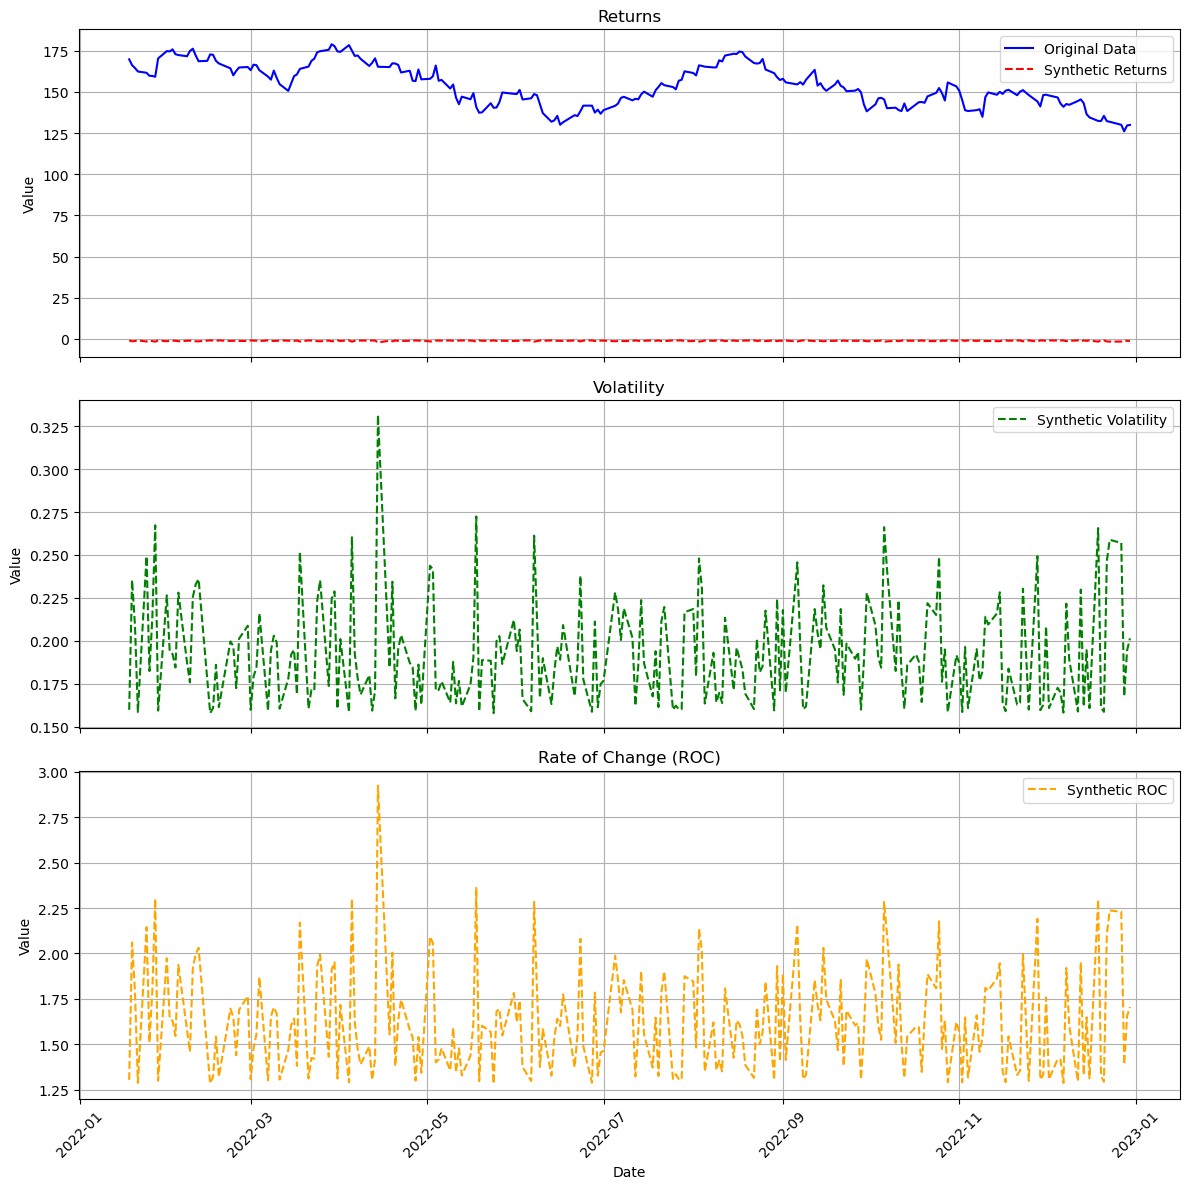

In [39]:
# Create subplots for better clarity
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot Returns
axs[0].plot(aligned_real_data.index, aligned_real_data.values, label="Original Data", color='blue')
axs[0].plot(aligned_real_data.index, synthetic_data[:, 0], label="Synthetic Returns", color='red', linestyle='--')
axs[0].set_title("Returns")
axs[0].legend()

# Plot Volatility
axs[1].plot(aligned_real_data.index, synthetic_data[:, 1], label="Synthetic Volatility", color='green', linestyle='--')
axs[1].set_title("Volatility")
axs[1].legend()

# Plot Rate of Change (ROC)
axs[2].plot(aligned_real_data.index, synthetic_data[:, 2], label="Synthetic ROC", color='orange', linestyle='--')
axs[2].set_title("Rate of Change (ROC)")
axs[2].legend()

# Add shared labels and format
for ax in axs:
    ax.set_ylabel("Value")
    ax.grid(True)

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


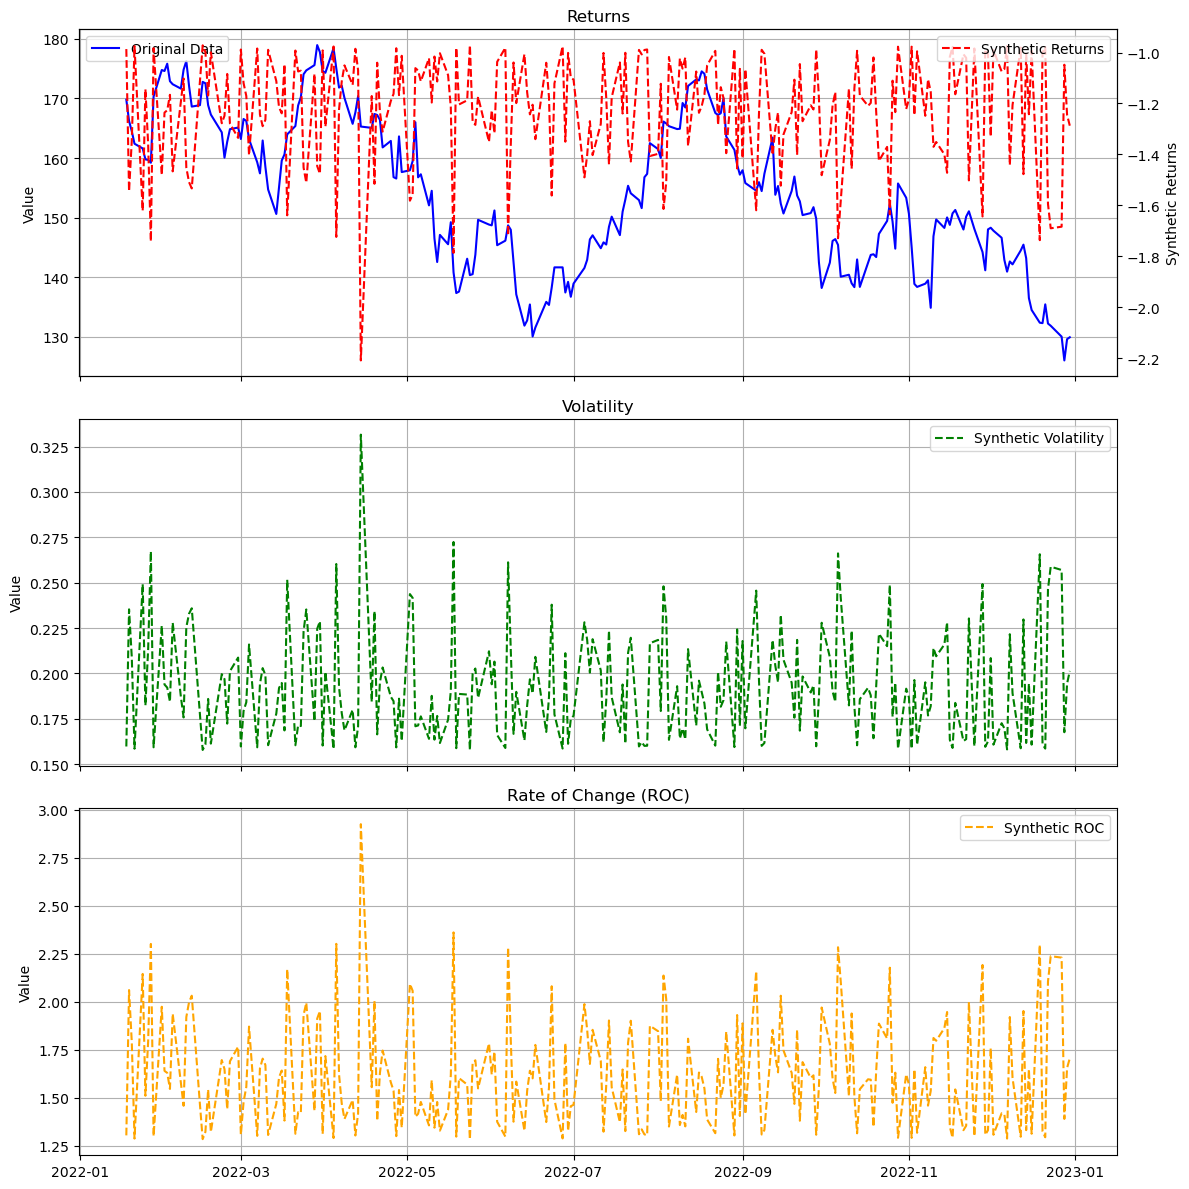

In [41]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot Returns with secondary y-axis for Synthetic Returns
ax1 = axs[0]
ax2 = ax1.twinx()  # Secondary y-axis

ax1.plot(aligned_real_data.index, aligned_real_data.values, label="Original Data", color='blue')
ax2.plot(aligned_real_data.index, synthetic_data[:, 0], label="Synthetic Returns", color='red', linestyle='--')

ax1.set_title("Returns")
ax1.set_ylabel("Original Data")
ax2.set_ylabel("Synthetic Returns")

# Legends for both axes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Plot Volatility
axs[1].plot(aligned_real_data.index, synthetic_data[:, 1], label="Synthetic Volatility", color='green', linestyle='--')
axs[1].set_title("Volatility")
axs[1].legend()

# Plot Rate of Change (ROC)
axs[2].plot(aligned_real_data.index, synthetic_data[:, 2], label="Synthetic ROC", color='orange', linestyle='--')
axs[2].set_title("Rate of Change (ROC)")
axs[2].legend()

# Add shared labels and grid
for ax in axs:
    ax.set_ylabel("Value")
    ax.grid(True)

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (251,) and (241,)

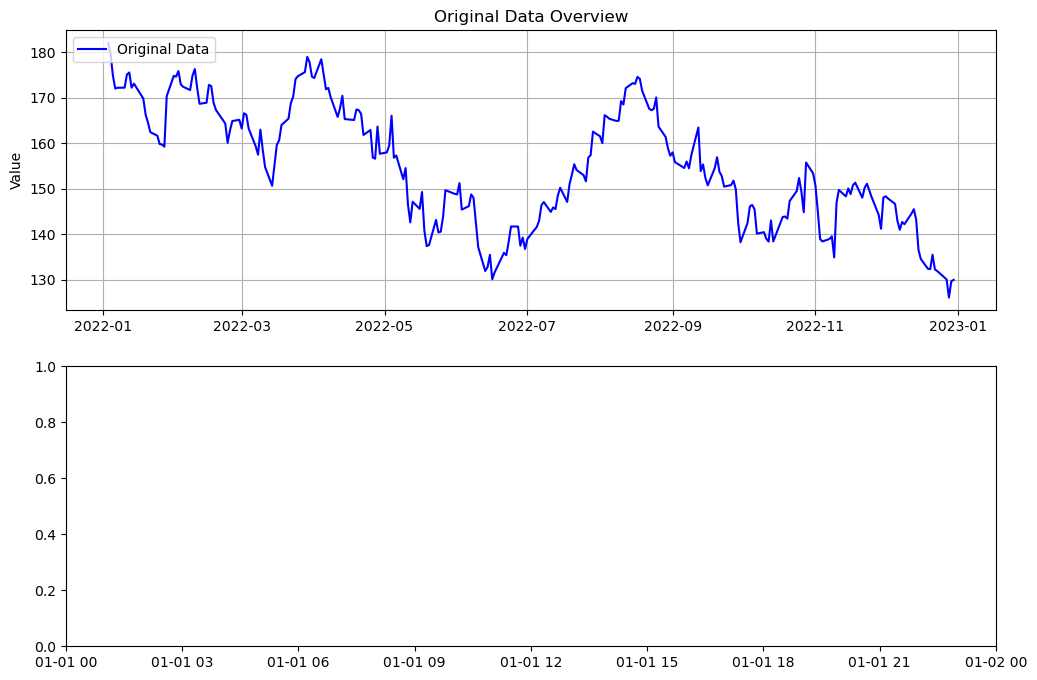

In [43]:
# Step 8: Fancy Charts for Original vs Synthetic Data
def plot_fancy_comparison(real_data, synthetic_data, original_title="Original Data", synthetic_title="Synthetic Data"):
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Plot Original Data
    axs[0].plot(real_data.index, real_data.values, label=original_title, color='blue', linewidth=1.5)
    axs[0].set_title(f"{original_title} Overview")
    axs[0].set_ylabel("Value")
    axs[0].grid(True)
    axs[0].legend(loc="upper left")

    # Plot Synthetic Data
    axs[1].plot(real_data.index, synthetic_data[:, 0], label=f"{synthetic_title} (Returns)", color='red', linestyle='--', linewidth=1.5)
    axs[1].plot(real_data.index, synthetic_data[:, 1], label=f"{synthetic_title} (Volatility)", color='green', linestyle=':', linewidth=1.5)
    axs[1].plot(real_data.index, synthetic_data[:, 2], label=f"{synthetic_title} (ROC)", color='orange', linestyle='-.', linewidth=1.5)
    axs[1].set_title(f"{synthetic_title} Features")
    axs[1].set_ylabel("Values")
    axs[1].grid(True)
    axs[1].legend(loc="upper left")

    # Add shared labels
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_fancy_comparison(real_data, synthetic_data)


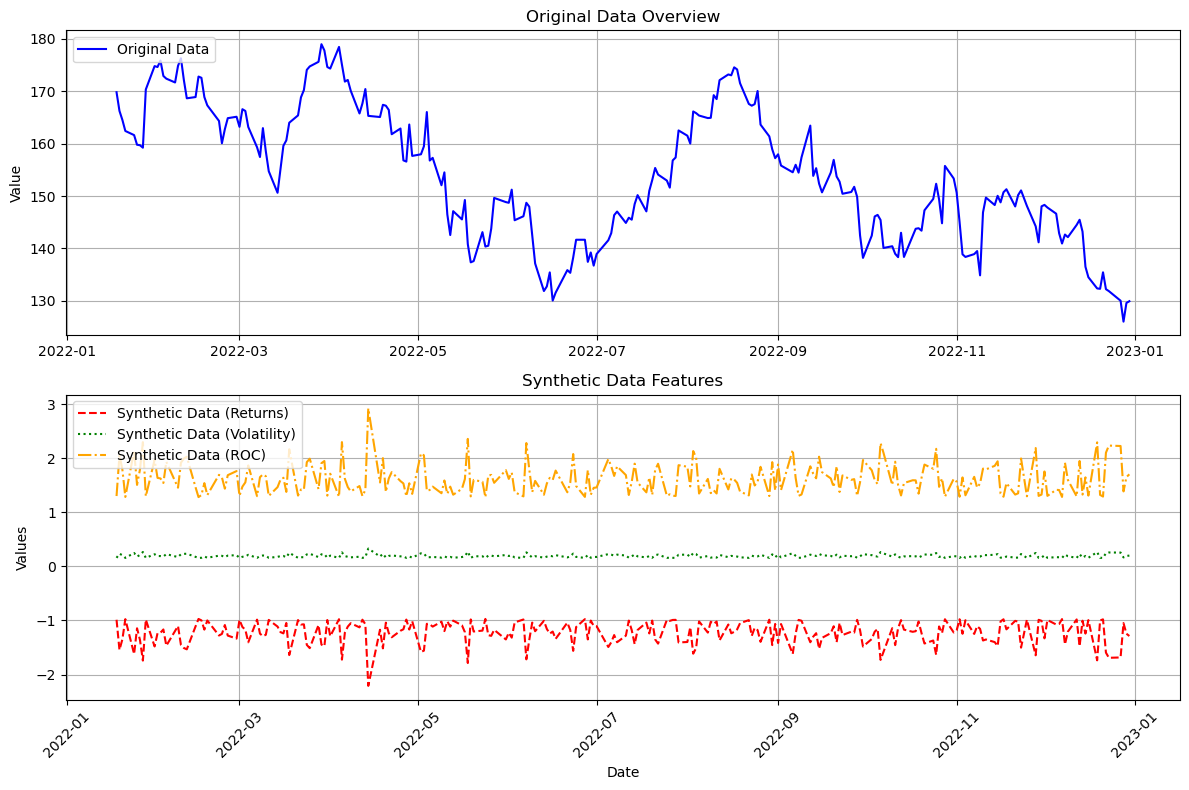

In [45]:
# Step 8: Fancy Charts for Original vs Synthetic Data (Handles Dimension Mismatch)
def plot_fancy_comparison(real_data, synthetic_data, original_title="Original Data", synthetic_title="Synthetic Data"):
    # Ensure the indices are aligned by trimming the larger dataset
    min_length = min(len(real_data), len(synthetic_data))
    aligned_real_data = real_data.iloc[-min_length:]  # Trim real_data
    aligned_synthetic_data = synthetic_data[-min_length:]  # Trim synthetic_data

    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Plot Original Data
    axs[0].plot(aligned_real_data.index, aligned_real_data.values, label=original_title, color='blue', linewidth=1.5)
    axs[0].set_title(f"{original_title} Overview")
    axs[0].set_ylabel("Value")
    axs[0].grid(True)
    axs[0].legend(loc="upper left")

    # Plot Synthetic Data
    axs[1].plot(aligned_real_data.index, aligned_synthetic_data[:, 0], label=f"{synthetic_title} (Returns)", color='red', linestyle='--', linewidth=1.5)
    axs[1].plot(aligned_real_data.index, aligned_synthetic_data[:, 1], label=f"{synthetic_title} (Volatility)", color='green', linestyle=':', linewidth=1.5)
    axs[1].plot(aligned_real_data.index, aligned_synthetic_data[:, 2], label=f"{synthetic_title} (ROC)", color='orange', linestyle='-.', linewidth=1.5)
    axs[1].set_title(f"{synthetic_title} Features")
    axs[1].set_ylabel("Values")
    axs[1].grid(True)
    axs[1].legend(loc="upper left")

    # Add shared labels
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_fancy_comparison(real_data, synthetic_data)


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float32DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float32DType'>)

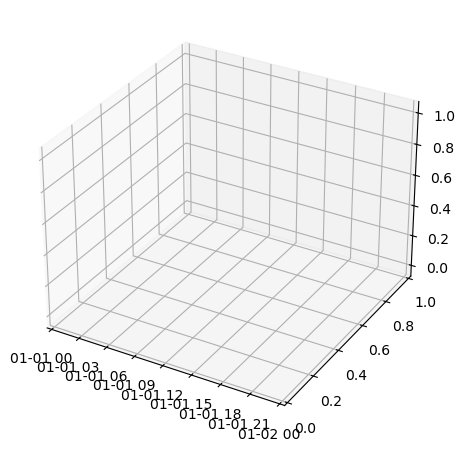

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def plot_3d_and_heatmap(real_data, synthetic_data):
    # Ensure alignment of dimensions
    min_length = min(len(real_data), len(synthetic_data))
    aligned_real_data = real_data.iloc[-min_length:]  # Trim real_data
    aligned_synthetic_data = synthetic_data[-min_length:]  # Trim synthetic_data

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(
        aligned_real_data.index, 
        aligned_synthetic_data[:, 0], 
        aligned_synthetic_data[:, 1], 
        c=aligned_synthetic_data[:, 2], cmap='viridis', marker='o'
    )
    ax.set_title("3D Scatter Plot of Synthetic Data")
    ax.set_xlabel("Date")
    ax.set_ylabel("Synthetic Feature 1")
    ax.set_zlabel("Synthetic Feature 2")

    # Create a heatmap of synthetic data
    plt.subplot(122)
    corr_matrix = pd.DataFrame(aligned_synthetic_data, columns=["Feature 1", "Feature 2", "Feature 3"]).corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title("Correlation Heatmap of Synthetic Features")
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_3d_and_heatmap(real_data, synthetic_data)


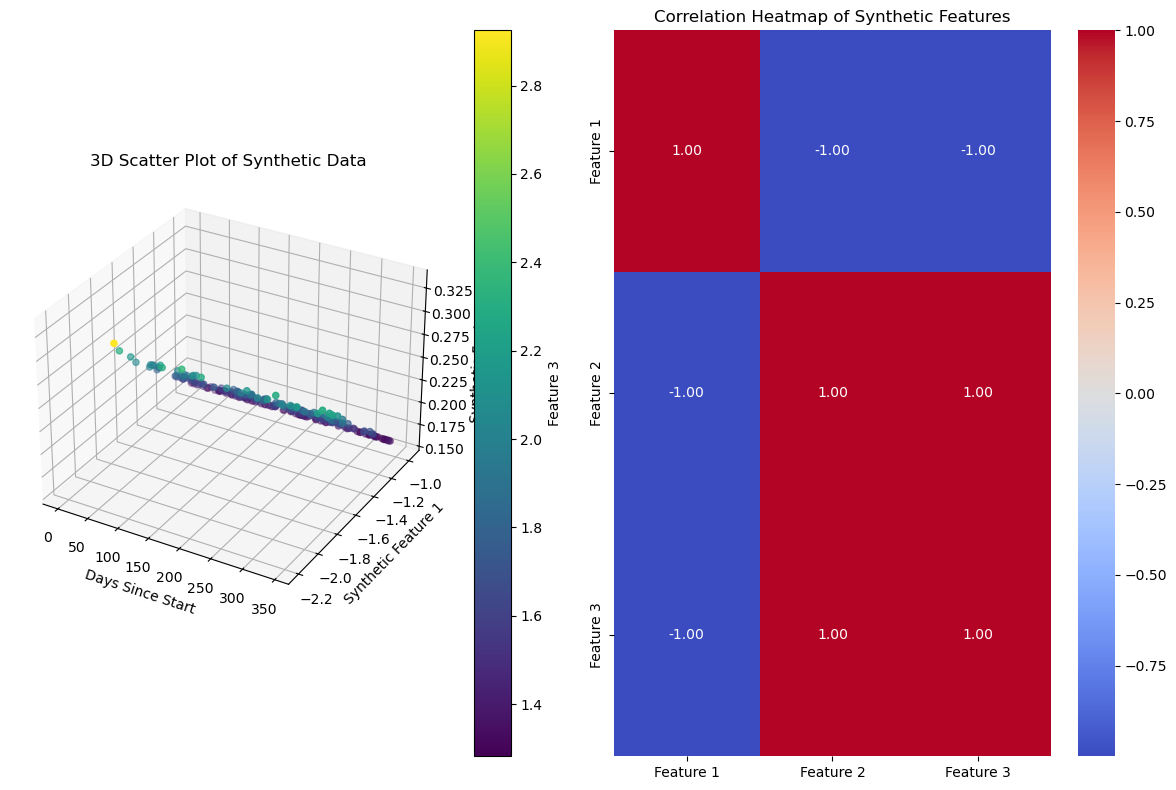

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def plot_3d_and_heatmap(real_data, synthetic_data):
    # Ensure alignment of dimensions
    min_length = min(len(real_data), len(synthetic_data))
    aligned_real_data = real_data.iloc[-min_length:]  # Trim real_data
    aligned_synthetic_data = synthetic_data[-min_length:]  # Trim synthetic_data

    # Convert datetime index to numerical values
    aligned_dates = (aligned_real_data.index - aligned_real_data.index[0]).days  # Days since start

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(121, projection='3d')
    sc = ax.scatter(
        aligned_dates,  # Numerical dates
        aligned_synthetic_data[:, 0], 
        aligned_synthetic_data[:, 1], 
        c=aligned_synthetic_data[:, 2], cmap='viridis', marker='o'
    )
    ax.set_title("3D Scatter Plot of Synthetic Data")
    ax.set_xlabel("Days Since Start")
    ax.set_ylabel("Synthetic Feature 1")
    ax.set_zlabel("Synthetic Feature 2")
    fig.colorbar(sc, ax=ax, label="Feature 3")

    # Create a heatmap of synthetic data
    plt.subplot(122)
    corr_matrix = pd.DataFrame(aligned_synthetic_data, columns=["Feature 1", "Feature 2", "Feature 3"]).corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title("Correlation Heatmap of Synthetic Features")
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_3d_and_heatmap(real_data, synthetic_data)
